In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')#控制matplotlib图表的外观,此处的作用是将主题设置为灰色网格
import warnings
def ignore_warn(*args,**kwargs): #  *args 用来将参数打包成tuple给函数体调用,  **kwargs 打包关键字参数成dict给函数体调用
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm,skew
from matplotlib.pyplot import MultipleLocator 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id",axis = 1, inplace = True)
test.drop("Id",axis = 1,inplace = True)

print('\nThe train data size after dropping Id feature is :{}'.format(train.shape))
print('\nThe test data size after dropping Id feature is :{}'.format(test.shape))


The train data size after dropping Id feature is :(1460, 80)

The test data size after dropping Id feature is :(1459, 79)


In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)#默认false,原行索引作为一列保留，列名为index
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is :{}".format(all_data.shape))

all_data size is :(2919, 79)


In [7]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ration' :all_data_na})
missing_data.head(20)

,Missing Ration
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by featrue')

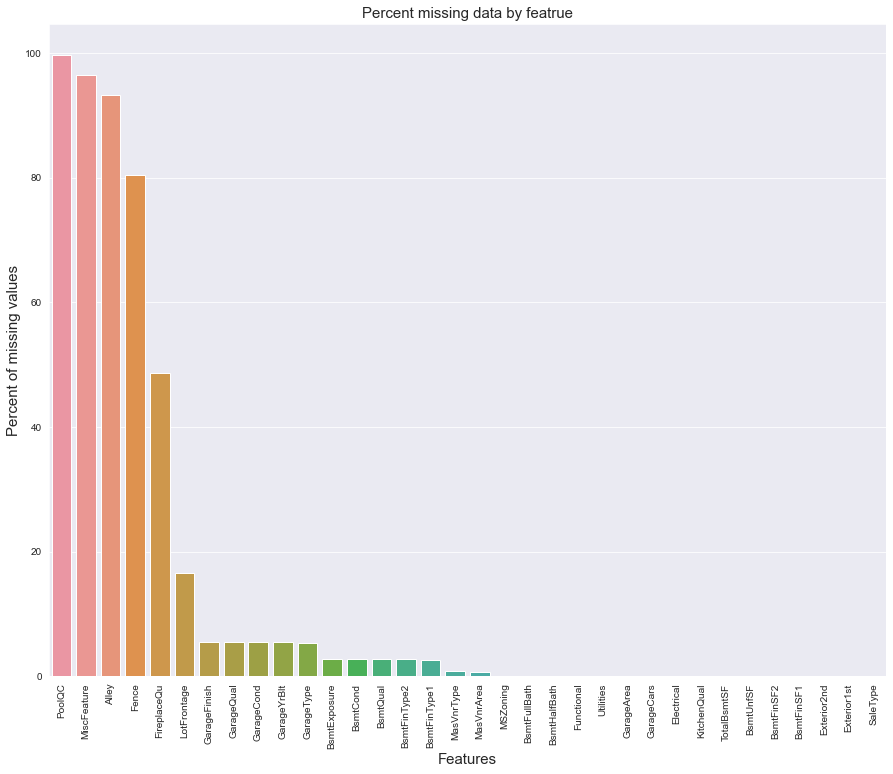

In [8]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na.values)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by featrue',fontsize=15)


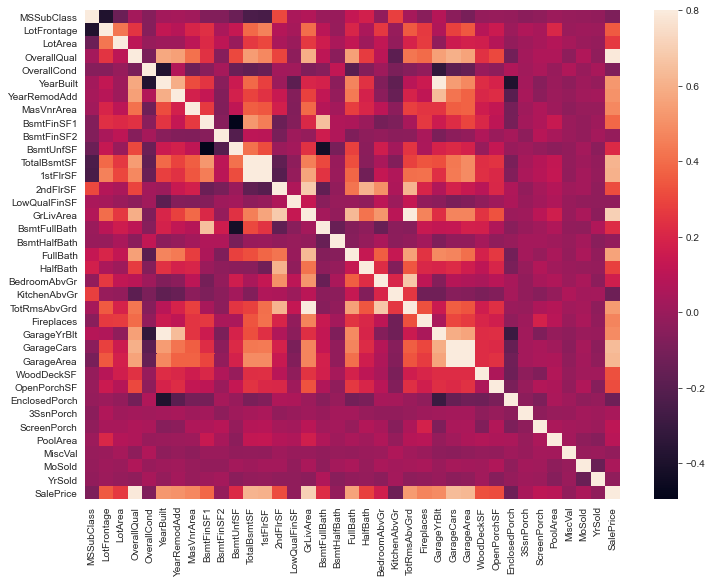

In [9]:
corrmat = train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square = False); #源文件中的热力图 feature较少

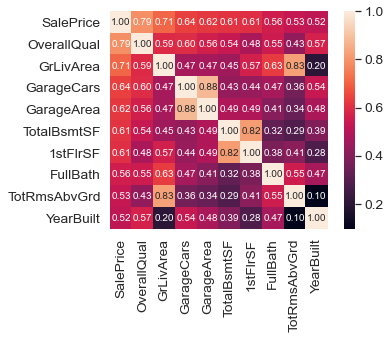

In [10]:
k=10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)



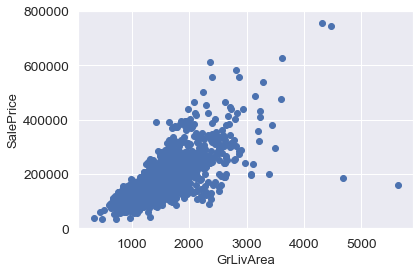

In [11]:
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylim(0,800000)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


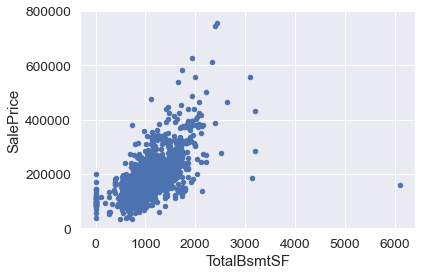

In [12]:
var = 'TotalBsmtSF'
data = pd.concat((train['SalePrice'], train[var]), axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


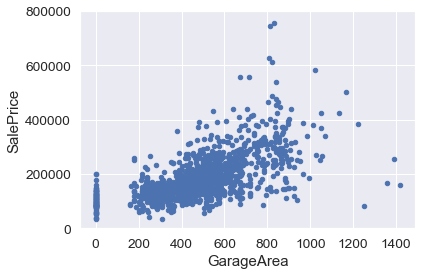

In [13]:
var = 'GarageArea'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));

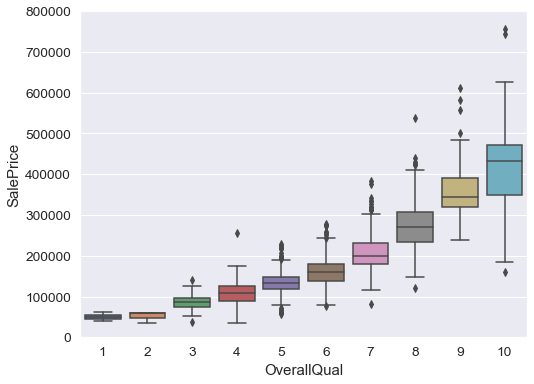

In [14]:
var = 'OverallQual'
data = pd.concat((train['SalePrice'],train[var]),axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

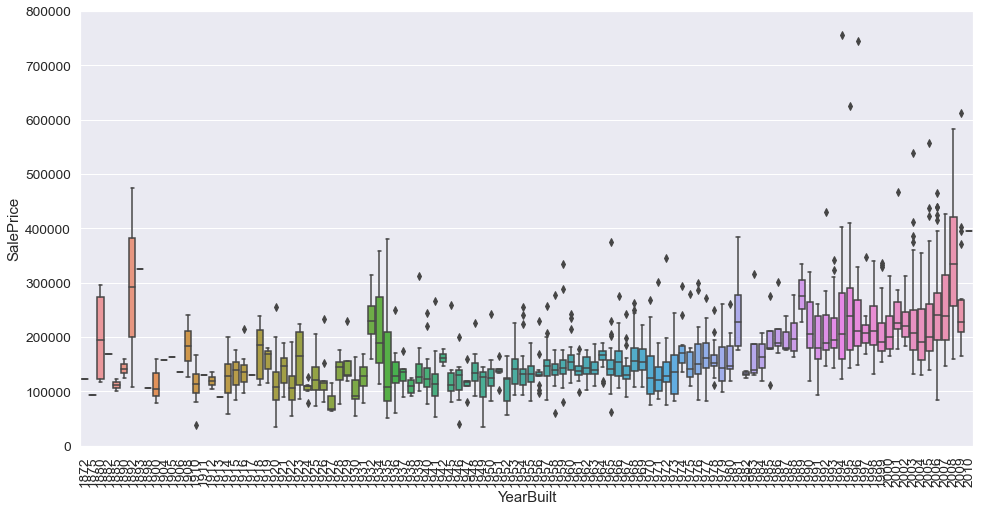

In [15]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f,ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=var,y='SalePrice',data=data).axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


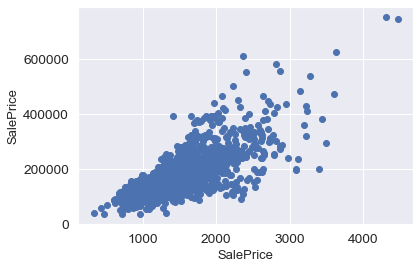

In [16]:
train = train.drop(train[(train['SalePrice']<300000) & (train['GrLivArea']>4000)].index)
fig,ax = plt.subplots()
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('SalePrice',fontsize=13)
plt.show()

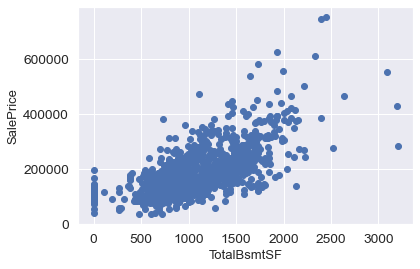

In [17]:
train = train.drop(train[(train['SalePrice']<200000) & (train['TotalBsmtSF']>5000)].index)
fig,ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('TotalBsmtSF',fontsize=13)
plt.show()

In [18]:
all_data_na = (all_data.isnull().sum())/len(all_data) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio ' :all_data_na})
missing_data.head()

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


In [19]:
all_data = all_data.drop(['PoolQC','MiscFeature','Alley'], axis=1)

In [20]:
all_data.shape

(2919, 76)

In [21]:
all_data['Fence'] = all_data['Fence'].fillna("None")
all_data['FireplaceQu'] = all_data["FireplaceQu"].fillna('None')

In [22]:
all_data["LotFrontage"] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [24]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [25]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [26]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [27]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna('None')
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [28]:
all_data.groupby('MSZoning')['MasVnrType'].count().reset_index()

,MSZoning,MasVnrType
0,C (all),25
1,FV,139
2,RH,26
3,RL,2265
4,RM,460


In [29]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [30]:
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [31]:
all_data_na = (all_data.isnull().sum())/len(all_data) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio ' :all_data_na})
missing_data.head()

,Missing Ratio



 mu=180932.92 and sigma = 79467.79


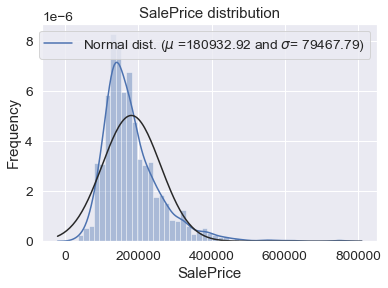

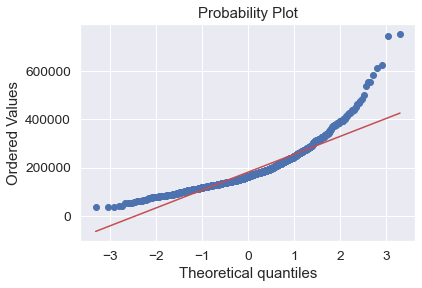

In [32]:
sns.distplot(train['SalePrice'] , fit=norm)

(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma = {:.2f}'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu $ ={:.2f} and $\sigma$= {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()



 mu = 12.02 and sigma = 0.40



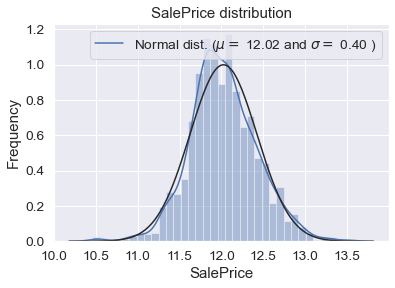

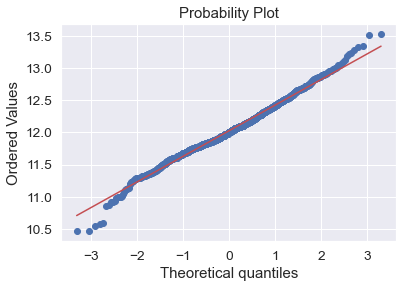

In [33]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
stats.probplot(train['SalePrice'],plot = plt)
plt.show()




In [34]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YearBuilt_cut'] = all_data['YearBuilt'].apply(lambda x:1 if x>1990 else 0)

In [35]:
tep = all_data[:ntrain]
tep['SalePrice'] = y_train

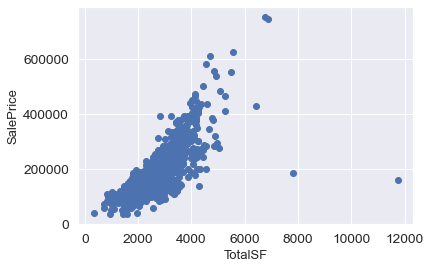

In [36]:
fig, ax = plt.subplots()
ax.scatter(tep['TotalSF'], tep['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

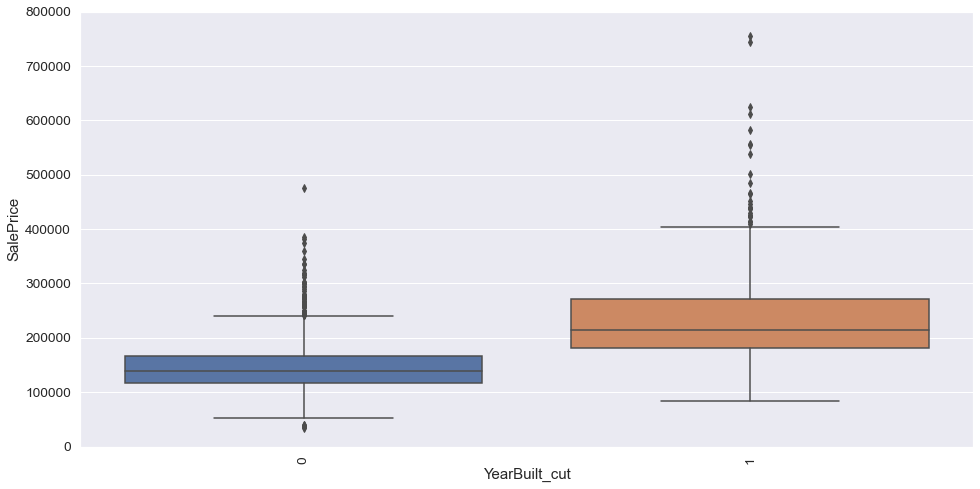

In [37]:
var = 'YearBuilt_cut'
data = pd.concat([tep['SalePrice'],tep[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 77)


In [39]:
all_data = pd.get_dummies(all_data)

In [40]:
all_data.shape

(2919, 219)

In [41]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,65.0,8450,1,3,0,7,4,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,0,80.0,9600,1,3,0,6,7,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,5,68.0,11250,1,0,0,7,4,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,6,60.0,9550,1,0,0,7,4,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,1,0,0,8,4,2000,2000,...,0,0,0,1,0,0,0,0,1,0


In [42]:
threshold = 0.9

corr_matrix = all_data.corr().abs()
corr_matrix.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,0.365568,0.193132,0.002709,0.065225,0.028488,0.048596,0.065277,0.037721,0.043707,...,0.004326,0.046509,0.014294,0.048228,0.001164,0.028103,0.061658,0.016628,0.024333,0.051562
LotFrontage,0.365568,1.000000,0.387612,0.046753,0.156113,0.064669,0.210123,0.059130,0.123801,0.087066,...,0.040872,0.110685,0.003486,0.082034,0.004117,0.046761,0.007862,0.015088,0.080383,0.108461
LotArea,0.193132,0.387612,1.000000,0.133936,0.181812,0.334575,0.100541,0.035617,0.024128,0.021612,...,0.015732,0.031601,0.004067,0.013592,0.014771,0.020429,0.024241,0.017927,0.022898,0.033434
Street,0.002709,0.046753,0.133936,1.000000,0.017584,0.093744,0.072424,0.018160,0.062184,0.080520,...,0.003368,0.019187,0.003150,0.006029,0.016953,0.004128,0.172024,0.008130,0.012266,0.019448
LotShape,0.065225,0.156113,0.181812,0.017584,1.000000,0.087731,0.259034,0.069531,0.281031,0.191105,...,0.015897,0.078430,0.008115,0.035889,0.048239,0.025181,0.027610,0.022270,0.006304,0.076399


In [43]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,NaN,0.365568,0.193132,0.002709,0.065225,0.028488,0.048596,0.065277,0.037721,0.043707,...,0.004326,0.046509,0.014294,0.048228,0.001164,0.028103,0.061658,0.016628,0.024333,0.051562
LotFrontage,NaN,NaN,0.387612,0.046753,0.156113,0.064669,0.210123,0.059130,0.123801,0.087066,...,0.040872,0.110685,0.003486,0.082034,0.004117,0.046761,0.007862,0.015088,0.080383,0.108461
LotArea,NaN,NaN,NaN,0.133936,0.181812,0.334575,0.100541,0.035617,0.024128,0.021612,...,0.015732,0.031601,0.004067,0.013592,0.014771,0.020429,0.024241,0.017927,0.022898,0.033434
Street,NaN,NaN,NaN,NaN,0.017584,0.093744,0.072424,0.018160,0.062184,0.080520,...,0.003368,0.019187,0.003150,0.006029,0.016953,0.004128,0.172024,0.008130,0.012266,0.019448
LotShape,NaN,NaN,NaN,NaN,NaN,0.087731,0.259034,0.069531,0.281031,0.191105,...,0.015897,0.078430,0.008115,0.035889,0.048239,0.025181,0.027610,0.022270,0.006304,0.076399


In [44]:
to_drop = [column for column in upper.columns if any(upper[column]>threshold)]

print('There are %d columns to remove'%(len(to_drop)))

There are 6 columns to remove


In [45]:
all_data = all_data.drop(columns = to_drop)
all_data.shape

(2919, 213)

In [46]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [47]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [48]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [49]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

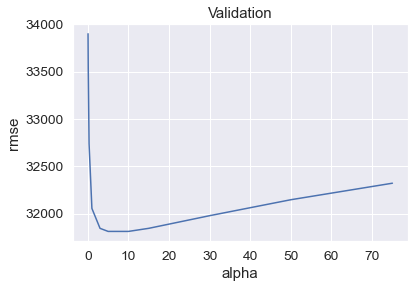

In [50]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
x_major_locator=MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel("alpha")
plt.ylabel("rmse")

In [51]:
cv_ridge

0.05     33899.763851
0.10     33539.201017
0.30     32738.482115
1.00     32053.913904
3.00     31843.231925
5.00     31810.779484
10.00    31810.821182
15.00    31843.447482
30.00    31977.123335
50.00    32145.754785
75.00    32320.269291
dtype: float64

In [52]:
clf = Ridge(alpha=5)
clf.fit(train,y_train)

Ridge(alpha=5)

In [53]:
predict = clf.predict(test)

In [55]:
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['SalePrice'] = predict
sub.head(10)

,ID,SalePrice
0,1461,102583.374439
1,1462,148136.413456
2,1463,168615.606722
3,1464,175546.327399
4,1465,221088.525682
5,1466,167015.535440
6,1467,180838.871496
7,1468,157856.158275
8,1469,192054.588033
9,1470,122732.260848
